In [36]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as


In [37]:
instance_image = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/gt_instance_image/0000.png')
actual_image = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/image/0000.png')
binary_mask = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/gt_binary_image/0000.png')

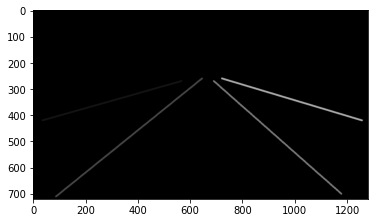

In [38]:
plt.imshow(instance_image)

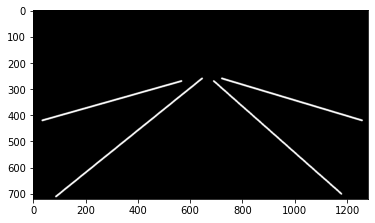

In [39]:
plt.imshow(binary_mask)

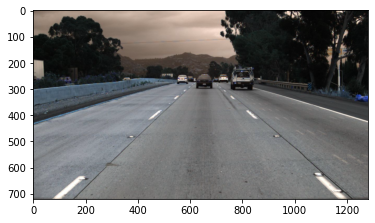

In [40]:
plt.imshow(actual_image)

In [41]:
binary_mask.shape

(720, 1280, 3)

In [43]:
np.unique(binary_mask[:,:])

array([  0, 255], dtype=uint8)

# Viewing json

In [46]:
import json

In [56]:
d_json = json.loads(open('/home/kugos/Work/Nayan/Lane_change/All_lane_json/7-17.json').read())

In [57]:
d_json[0]

{'id': 5470227,
 'image_url': 'https://storage.googleapis.com/nayan_training_data/Himanshu/lane_annotation_static/Set_2/lane_annotation_static/541229_frame124.jpg',
 'video_id': '541229',
 'question': 'Draw all lanes and lane boundaries',
 'filename': '541229_frame124.jpg',
 'data_set_id': 31874,
 'source_image_url': '',
 'predicted_template_url': 'http://49.205.180.243/template_icon/lanes_example.gif',
 'wf_step_position': 1,
 'bounding_boxes': None,
 'raw_overlay_data': '',
 'confidence_score': 0,
 'complete': True,
 'judgement': {'answer': '[{"judgementPoints":[],"points":[[631.7001,80.25902],[600.0481,153.85754],[638.0305,200.81407]],"template":"","templateName":"","type":"LINE"},{"judgementPoints":[],"points":[[612.37573,347.34506],[435.79083,204.81036],[474.43964,128.21463]],"template":"","templateName":"","type":"LINE"},{"judgementPoints":[],"points":[[457.78064,344.68088],[292.52383,216.79927],[346.16565,93.91304]],"template":"","templateName":"","type":"LINE"},{"judgementPoint

In [58]:
sample_json = d_json[0]

In [62]:
eval(sample_json['judgement']['answer'])[0]

{'judgementPoints': [],
 'points': [[631.7001, 80.25902],
  [600.0481, 153.85754],
  [638.0305, 200.81407]],
 'template': '',
 'templateName': '',
 'type': 'LINE'}

In [118]:
import requests
def save_image(image_url, set_path, filename):
    '''
    This Function is to download and save the image from the given URL
    
    Parameters
    -----------
    'image_url': str
        URL for the image to be downloaded
    
    'set_path': str
        Dir path to save the downloaded image
    
    'filename': str
        Filename that need to be used while saving the image
    '''

    r3 = requests.get(image_url,verify = False)
    image_path = os.path.join(set_path, filename)
    with open(image_path,'wb') as f2: 
        f2.write(r3.content)
    return image_path
def get_bezier_points(points):

    """
    Points are in the form of 1st 2nd and 3rd where 1st is the starting point, 
    3rd is the ending point and 2nd is the control point
    """
    length = len(points)
    no_lines = math.floor(length/2)
    # print(no_lines)
    d_total = np.zeros([1,2])
    for i in range(no_lines):
        if i == 1:
            start_point = list(points[0])
            control_point = points[1]
            end_point = list(points[2])
        if i == 2:
            start_point = list(points[2])
            control_point = points[3]
            end_point = list(points[4])
        elif i == 3:
            start_point = list(points[4])
            control_point = points[5]
            end_point = list(points[6])
        elif i == 4:
            start_point = list(points[6])
            control_point = points[7]
            end_point = list(points[8])   
        elif i == 5:
            start_point = list(points[8])
            control_point = points[9]
            end_point = list(points[10])
        elif i == 6:
            start_point = list(points[10])
            control_point = points[11]
            end_point = list(points[12])
        elif i == 7:
            start_point = list(points[12])
            control_point = points[13]
            end_point = list(points[14])
        elif i == 8:
            start_point = list(points[14])
            control_point = points[15]
            end_point = list(points[16])
        else:
            start_point = list(points[0])
            control_point = points[1]
            end_point = list(points[2])                
        intermediate_points = []
        t=0.1
        intermediate_points.append(start_point)
        while t < 1:
            x = math.pow((1-t), 2)*start_point[0] + 2*t*(1-t) * \
                control_point[0] + math.pow(t, 2)*end_point[0]
            y = math.pow((1-t), 2)*start_point[1] + 2*t*(1-t) * \
                control_point[1] + math.pow(t, 2)*end_point[1]
            intermediate_points.append([int(x), int(y)])
            t += 0.1
        intermediate_points.append(end_point)
        d = np.array(intermediate_points)
        d_total = np.concatenate((d_total, d))
    #output = cv2.polylines(image, np.int32([d]), isClosed=False, color=(0,255,255), thickness=10)
    d_total = d_total[1:][:]
    print("d_total: ", d_total)
    return d_total

In [119]:
save_image(sample_json['image_url'], './', 'sample_3819.jpg')

'./sample_3819.jpg'

In [120]:
lanes = eval(sample_json['judgement']['answer'])

In [121]:
image_path = './sample_3819.jpg'
image = cv2.imread(image_path)
height, width = image.shape[:2]
            
blank_image = np.zeros((height,width))

In [122]:
len(lanes)

11

In [127]:
import math
from random import randint
for lane in lanes:
    lane_points = [(int(x*width),int(y*height)) if x<1 and y<1 else (int(x),int(y))  for x,y in lane['points']]
    # print("lane_points: ", lane_points)
    new_lane_points = get_bezier_points(lane_points)
    # print("new_lane_points: ", new_lane_points)
    cv2.polylines(blank_image, [np.int32(new_lane_points)],False,(randint(0,255)),10)
    # break


d_total:  [[631.  80.]
 [625.  94.]
 [621. 108.]
 [618. 121.]
 [617. 134.]
 [617. 146.]
 [618. 158.]
 [621. 169.]
 [625. 180.]
 [631. 190.]
 [638. 199.]
 [638. 200.]]
d_total:  [[612. 347.]
 [578. 319.]
 [549. 292.]
 [525. 267.]
 [504. 243.]
 [489. 220.]
 [477. 199.]
 [470. 179.]
 [467. 161.]
 [468. 143.]
 [474. 128.]
 [474. 128.]]
d_total:  [[457. 344.]
 [426. 318.]
 [399. 293.]
 [377. 267.]
 [360. 242.]
 [346. 217.]
 [337. 192.]
 [333. 167.]
 [333. 142.]
 [337. 117.]
 [346.  93.]
 [346.  93.]]
d_total:  [[306. 341.]
 [274. 311.]
 [248. 282.]
 [227. 254.]
 [211. 227.]
 [200. 201.]
 [194. 176.]
 [193. 152.]
 [197. 129.]
 [206. 107.]
 [220.  87.]
 [221.  87.]]
d_total:  [[152. 335.]
 [123. 312.]
 [100. 289.]
 [ 81. 266.]
 [ 66. 243.]
 [ 56. 219.]
 [ 50. 195.]
 [ 49. 170.]
 [ 53. 146.]
 [ 61. 121.]
 [ 73.  96.]
 [ 74.  96.]]
d_total:  [[210. 101.]
 [215.  91.]
 [220.  81.]
 [226.  72.]
 [231.  62.]
 [237.  53.]
 [242.  43.]
 [247.  34.]
 [253.  24.]
 [258.  15.]
 [264.   6.]
 [264.   6.]

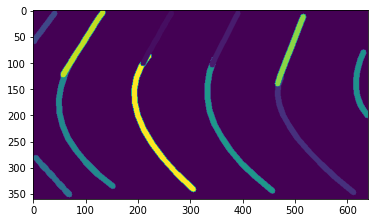

In [105]:
plt.imshow(blank_image)

In [107]:
cv2.imwrite("blank_image.jpg", blank_image)

True